# Churn data analysis

Submitted by:
<br>Nabila Tajrin Bristy
<br>Dhaka, Bangladesh

#### Objectives
- Decision Tree Classification
- Cross-Validation
- Grid Search
- Confusion Matrix, Classification report, and ROC-AUC
- accuracy, precision, recall, f1 score

#### Tasks
1. Load the dataset and perform data preprocessing
2. Which approach works better for this dataset? A. One-hot Encoding or B. Label Encoding
3. Perform Data Transformation (StandardScaler or MinMaxScaler). Does Data Transformation improve model performance? Is it necessary to standardize or normalize data for tree-based machine learning models?
4. Perform Grid Search and Cross-Validation with Decision Tree Classifier
5. Show a tree diagram of the Decision Tree
6. Show the Confusion Matrix, Classification report, and ROC-AUC
7. Explain accuracy, precision, recall, f1 score


#### References
dataset: https://github.com/SKawsar/machine_learning_with_python/blob/main/Churn.csv <br>
Actual dataset source: https://learn.datacamp.com/courses/marketing-analytics-predicting-customer-churn-in-python

### Import required libraries and packages

In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset and perform data preprocessing

In [92]:
df = pd.read_csv("Churn.csv", na_values="?")
df = df.dropna()
display(df.head())
print(df.shape)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


(3333, 21)


#### Exploratory Data Analysis

In [93]:
df.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


#### Checking categorical variables

In [94]:
df['Churn'].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

In [95]:
df['Intl_Plan'].value_counts()

no     3010
yes     323
Name: Intl_Plan, dtype: int64

In [96]:
df['Vmail_Plan'].value_counts()

no     2411
yes     922
Name: Vmail_Plan, dtype: int64

## Checking for missing values and data types

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 21 columns):
Account_Length    3333 non-null int64
Vmail_Message     3333 non-null int64
Day_Mins          3333 non-null float64
Eve_Mins          3333 non-null float64
Night_Mins        3333 non-null float64
Intl_Mins         3333 non-null float64
CustServ_Calls    3333 non-null int64
Churn             3333 non-null object
Intl_Plan         3333 non-null object
Vmail_Plan        3333 non-null object
Day_Calls         3333 non-null int64
Day_Charge        3333 non-null float64
Eve_Calls         3333 non-null int64
Eve_Charge        3333 non-null float64
Night_Calls       3333 non-null int64
Night_Charge      3333 non-null float64
Intl_Calls        3333 non-null int64
Intl_Charge       3333 non-null float64
State             3333 non-null object
Area_Code         3333 non-null int64
Phone             3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 572.9+ KB


#### Target variable: 'Churn'

In [98]:
print(df['Churn'].value_counts())

no     2850
yes     483
Name: Churn, dtype: int64


In [99]:
df = pd.read_csv("Churn.csv", na_values="?")
df = df.dropna()
#df.columns = ["sepal length", "sepal width", "petal length", "petal width", "class"]

display(df.sample(10))
print(df.shape)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
2288,34,0,193.7,126.9,221.2,8.8,0,no,no,no,...,32.93,84,10.79,166,9.95,4,2.38,NE,415,361-6814
2773,134,34,247.2,225.5,186.3,6.1,2,yes,no,yes,...,42.02,133,19.17,76,8.38,5,1.65,NJ,510,373-3959
1425,55,0,119.7,231.8,222.3,4.6,2,no,no,no,...,20.35,96,19.70,113,10.00,2,1.24,NM,510,338-9873
1904,174,33,167.8,205.3,130.0,14.5,4,yes,no,yes,...,28.53,91,17.45,132,5.85,4,3.92,WA,408,352-6068
912,45,0,159.8,120.4,163.0,10.6,2,no,no,no,...,27.17,86,10.23,93,7.34,3,2.86,IA,510,332-2965
2197,133,0,216.2,222.2,192.0,3.1,2,no,no,no,...,36.75,133,18.89,95,8.64,1,0.84,LA,415,360-7079
1072,164,25,219.1,151.5,50.1,14.3,1,no,no,yes,...,37.25,99,12.88,60,2.25,6,3.86,MO,408,400-3497
941,63,0,153.5,287.3,230.2,6.5,2,no,no,no,...,26.10,115,24.42,85,10.36,5,1.76,IA,510,402-1725
2706,125,0,206.0,198.1,135.9,13.2,0,no,no,no,...,35.02,71,16.84,116,6.12,3,3.56,WV,415,381-7597
581,171,25,223.2,183.2,150.8,10.2,3,no,no,yes,...,37.94,118,15.57,90,6.79,3,2.75,PA,415,416-1557


(3333, 21)


In [100]:
display(df.describe())

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


#### Create feature set and target

In [101]:
X = df.drop('Churn', axis=1)
y = df[['Churn']]

print(X.shape, y.shape)

(3333, 20) (3333, 1)


## One-hot encoding

In [102]:
X = pd.get_dummies(X, columns=['Intl_Plan', 'Vmail_Plan', 'State', 'Phone'], drop_first=True)

display(X.head())
print(X.shape)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,...,Phone_422-5350,Phone_422-5865,Phone_422-5874,Phone_422-6685,Phone_422-6690,Phone_422-7728,Phone_422-8268,Phone_422-8333,Phone_422-8344,Phone_422-9964
0,128,25,265.1,197.4,244.7,10.0,1,110,45.07,99,...,0,0,0,0,0,0,0,0,0,0
1,107,26,161.6,195.5,254.4,13.7,1,123,27.47,103,...,0,0,0,0,0,0,0,0,0,0
2,137,0,243.4,121.2,162.6,12.2,0,114,41.38,110,...,0,0,0,0,0,0,0,0,0,0
3,84,0,299.4,61.9,196.9,6.6,2,71,50.90,88,...,0,0,0,0,0,0,0,0,0,0
4,75,0,166.7,148.3,186.9,10.1,3,113,28.34,122,...,0,0,0,0,0,0,0,0,0,0


(3333, 3400)


## Split the dataset intro train and test set

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42, 
                                                    stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2666, 3400) (667, 3400) (2666, 1) (667, 1)


## Model Performance Evaluation

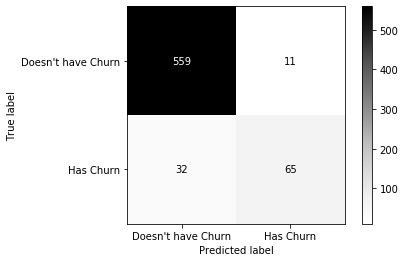

In [104]:
plot_confusion_matrix(model_DT, 
                      X_test, 
                      y_test, 
                      display_labels=["Doesn't have Churn", "Has Churn"],
                      cmap='Greys')
plt.show()

In [105]:
y_pred_DT = model_DT.predict(X_test)

In [106]:
print(y_true)

NameError: name 'y_true' is not defined

In [109]:
print('Accuracy: ', accuracy_score(y_test, y_pred_DT))

print(classification_report(y_test, y_pred_DT))

fpr, tpr, thr = roc_curve(y_test, model_DT.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, y_pred_DT)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='green', lw=2, label="Curve Area = %0.3f" % auc)
#plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

Accuracy:  0.9355322338830585
              precision    recall  f1-score   support

          no       0.95      0.98      0.96       570
         yes       0.86      0.67      0.75        97

    accuracy                           0.94       667
   macro avg       0.90      0.83      0.86       667
weighted avg       0.93      0.94      0.93       667



ValueError: y_true takes value in {'no', 'yes'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

## Label Encoding

## Perform Data Transformation (StandardScaler or MinMaxScaler)

In [89]:
# normalize the feature columns
scaler = MinMaxScaler()

for col in features.columns:
    features[col] = scaler.fit_transform(features[[col]])

display(features.sample(10))

NameError: name 'features' is not defined

In [90]:
features.describe()

NameError: name 'features' is not defined

## Decision Tree classifier, no grid search

In [85]:
model_DT = DecisionTreeClassifier(random_state = 42)
model_DT = model_DT.fit(X_train, y_train)

## Perform Grid Search and Cross-Validation with Decision Tree Classifier

## Tree diagram of the Decision Tree

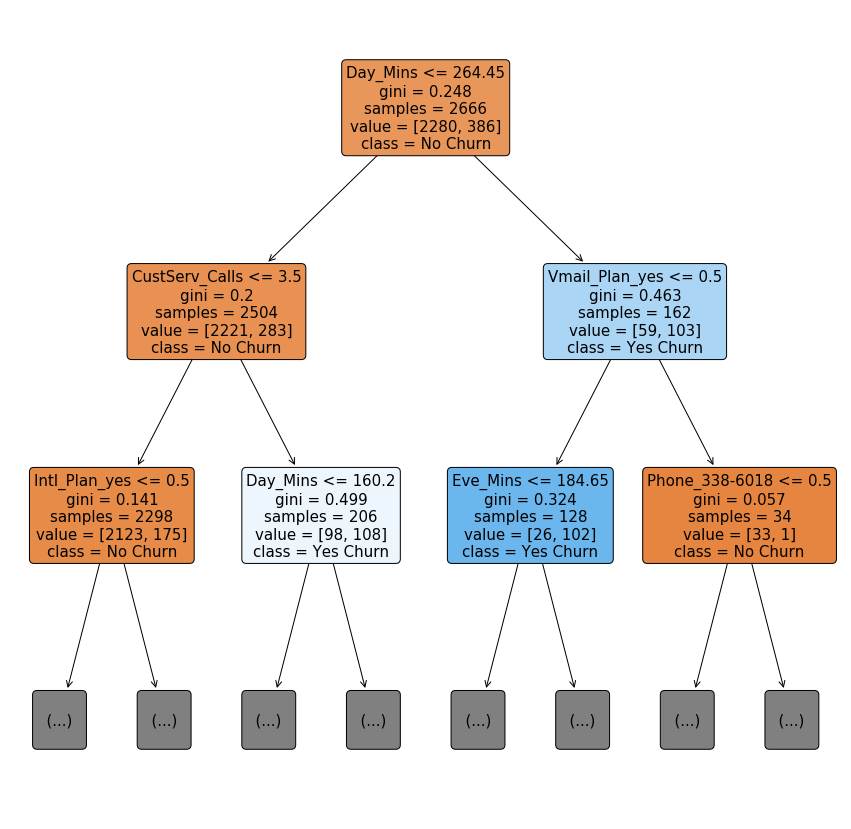

In [80]:
plt.figure(figsize = (15, 15))
plot_tree(model_DT, 
          filled=True,
          rounded=True,
          class_names = ["No Churn", "Yes Churn"],
          feature_names = X.columns,
          max_depth=2, 
          fontsize=15)

plt.show()

## Confusion Matrix, Classification report

## ROC: Receiver Operating Characterisitcs and AUC: Area Under the Curve

In [86]:

fpr, tpr, thr = roc_curve(y_test['Churn'], 
                          y_test['probability'])
auc = np.round(roc_auc_score(y_test['Churn'], 
                             y_test['predicted_Churn']), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

KeyError: 'probability'

## Explain accuracy, precision, recall, f1 score